# 4.3.4 抽出した文章群から日本語極性辞書にマッチする単語を特定しトーンを算出
抽出した文章群から乾・鈴木(2008)で公開された日本語評価極性辞書を用いて、マッチする単語を特定しトーンを算出する。ここでは、osetiと呼ばれる日本語評価極性辞書を用いて極性の判定を行うPythonのライブラリを用いた。

In [1]:
import glob

def call_sample_dir_name(initial_name):
    if initial_name == "a":
        return "AfterSample"
    elif  initial_name == "t":
        return "TransitionPeriodSample"
    else:
        return "BeforeSample"


def call_csv_files(sample_dir_name="AfterSample", data_frame_spec=None, industry_spec=None):
    
    if data_frame_spec is None:
        
        if industry_spec is None:
            csv_files = glob.glob('/home/jovyan/3FetchingMDandA' + f"/**/{sample_dir_name}/*.csv", recursive=True)
        else:
             csv_files = glob.glob(f'/home/jovyan/3FetchingMDandA' + f"/**/{industry_spec}/{sample_dir_name}/*.csv", recursive=True)
    else:
        if industry_spec is None:
            csv_files = glob.glob(f'/home/jovyan/3FetchingMDandA/{data_frame_spec}' + f"/**/{sample_dir_name}/*.csv", recursive=True)
        else:
             csv_files = glob.glob(f"/home/jovyan/3FetchingMDandA/{data_frame_spec}/{industry_spec}/{sample_dir_name}/*.csv", recursive=True)
    
    return  csv_files

In [2]:
import glob
import pandas as pd
import os 
import oseti


# analyzer = oseti.Analyzer()
def make_atb_li(atb_file, analyzer):

    atb_df = pd.read_csv(atb_file, index_col=0)
    if len(atb_df) < 1:
        return 0
    texts_joined = "".join(list(atb_df["Text"].values))
    #parse error対策
    texts_joined = texts_joined.replace("\n", "")
    
    scores = analyzer.count_polarity(texts_joined)
    sum_plus = 0
    sum_minus = 0
    for score in scores:
        sum_plus += score["positive"]
        sum_minus += score["negative"]

    ret_val =  (sum_plus - sum_minus)/(sum_plus + sum_minus)
    return ret_val

In [3]:
#今回は全企業を抽出して分析
data_frame_spec=None
industry_spec=None


#before
dir_name_b = call_sample_dir_name("b")
before_csv_files  = call_csv_files(dir_name_b, data_frame_spec, industry_spec)
#transition
dir_name_t = call_sample_dir_name("t")
transition_period_csv_files = call_csv_files(dir_name_t, data_frame_spec, industry_spec)
#after
dir_name_a = call_sample_dir_name("a")
after_csv_files = call_csv_files(dir_name_a, data_frame_spec, industry_spec)
print("--------ここまで終わりました1------")

--------ここまで終わりました1------


In [4]:
analyzer = oseti.Analyzer()

In [11]:
#cache化して速度向上
before_li = []
f = before_li.append

for b_file in  before_csv_files :
    tmp = make_atb_li(b_file, analyzer) 
    f(tmp)
print("-------ここまで終わりました2-------")

-------ここまで終わりました2-------


In [8]:
transition_period_li = []
f = transition_period_li.append

for t_file in  transition_period_csv_files  :
    tmp = make_atb_li(t_file, analyzer) 
    f(tmp)
print("-------ここまで終わりました3-------")

-------ここまで終わりました3-------


In [13]:
after_li = []
f = after_li.append

for a_file in  after_csv_files :
    tmp = make_atb_li(a_file, analyzer) 
    f(tmp)
print("-------ここまで終わりました4-------")


-------ここまで終わりました4-------


In [14]:
#各年度のサンプルサイズ
print(len(after_li), len(transition_period_li) ,len(before_li))

2277 2277 2277


(array([  2.,   1.,   0.,   1.,   1.,   0.,   3.,   3.,   3.,   1.,   4.,
          6.,  11.,  11.,  11.,   9.,  10.,  16.,  15.,  30.,  23.,  32.,
         41.,  35.,  59.,  68.,  69.,  97.,  89., 109., 108., 111., 139.,
        146., 156., 138., 128., 123., 102.,  81.,  73.,  64.,  50.,  39.,
         25.,  18.,   6.,   7.,   2.,   1.]),
 array([0.20076482, 0.21488906, 0.2290133 , 0.24313753, 0.25726177,
        0.27138601, 0.28551025, 0.29963449, 0.31375873, 0.32788297,
        0.3420072 , 0.35613144, 0.37025568, 0.38437992, 0.39850416,
        0.4126284 , 0.42675263, 0.44087687, 0.45500111, 0.46912535,
        0.48324959, 0.49737383, 0.51149807, 0.5256223 , 0.53974654,
        0.55387078, 0.56799502, 0.58211926, 0.5962435 , 0.61036774,
        0.62449197, 0.63861621, 0.65274045, 0.66686469, 0.68098893,
        0.69511317, 0.7092374 , 0.72336164, 0.73748588, 0.75161012,
        0.76573436, 0.7798586 , 0.79398284, 0.80810707, 0.82223131,
        0.83635555, 0.85047979, 0.86460403, 0.

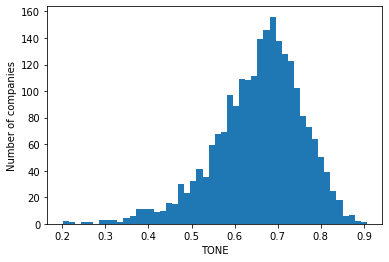

In [15]:
#beforeのヒストグラム
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.ylabel("Number of companies")
plt.xlabel("TONE")
ax.hist(before_li, bins=50)

(array([  1.,   1.,   1.,   1.,   1.,   1.,   1.,   4.,   0.,   5.,   5.,
          4.,   5.,   6.,   8.,  11.,  20.,  10.,  12.,  20.,  25.,  26.,
         41.,  34.,  58.,  58.,  53.,  81.,  73.,  93.,  96., 117., 125.,
        113., 148., 156., 122., 132., 114., 101.,  86.,  82.,  58.,  46.,
         40.,  30.,  19.,  19.,  10.,   4.]),
 array([0.17535545, 0.18951824, 0.20368104, 0.21784383, 0.23200663,
        0.24616942, 0.26033221, 0.27449501, 0.2886578 , 0.3028206 ,
        0.31698339, 0.33114618, 0.34530898, 0.35947177, 0.37363456,
        0.38779736, 0.40196015, 0.41612295, 0.43028574, 0.44444853,
        0.45861133, 0.47277412, 0.48693692, 0.50109971, 0.5152625 ,
        0.5294253 , 0.54358809, 0.55775089, 0.57191368, 0.58607647,
        0.60023927, 0.61440206, 0.62856486, 0.64272765, 0.65689044,
        0.67105324, 0.68521603, 0.69937882, 0.71354162, 0.72770441,
        0.74186721, 0.75603   , 0.77019279, 0.78435559, 0.79851838,
        0.81268118, 0.82684397, 0.84100676, 0.

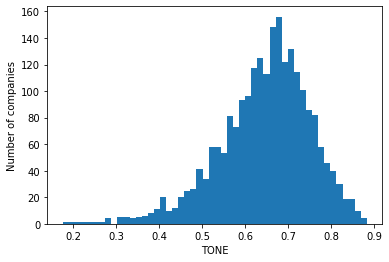

In [16]:
#transitionのヒストグラム
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.ylabel("Number of companies")
plt.xlabel("TONE")
ax.hist(transition_period_li, bins=50)

(array([  2.,   3.,   1.,   1.,   2.,   3.,   4.,   4.,   4.,   7.,  10.,
         12.,  15.,  23.,   9.,  16.,  20.,  27.,  35.,  49.,  48.,  67.,
         75.,  88.,  81.,  87., 108., 123., 103., 119., 126., 141., 117.,
        119., 107.,  77.,  84.,  65.,  84.,  51.,  47.,  36.,  22.,  26.,
          8.,   9.,   5.,   2.,   3.,   2.]),
 array([0.08817204, 0.10338973, 0.11860743, 0.13382512, 0.14904281,
        0.1642605 , 0.17947819, 0.19469588, 0.20991357, 0.22513126,
        0.24034896, 0.25556665, 0.27078434, 0.28600203, 0.30121972,
        0.31643741, 0.3316551 , 0.34687279, 0.36209048, 0.37730818,
        0.39252587, 0.40774356, 0.42296125, 0.43817894, 0.45339663,
        0.46861432, 0.48383201, 0.49904971, 0.5142674 , 0.52948509,
        0.54470278, 0.55992047, 0.57513816, 0.59035585, 0.60557354,
        0.62079124, 0.63600893, 0.65122662, 0.66644431, 0.681662  ,
        0.69687969, 0.71209738, 0.72731507, 0.74253277, 0.75775046,
        0.77296815, 0.78818584, 0.80340353, 0.

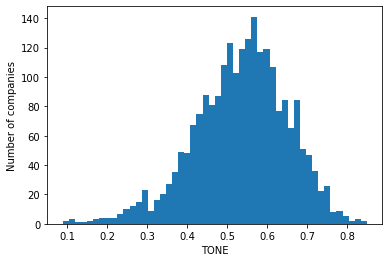

In [17]:
#afterのヒストグラム
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.ylabel("Number of companies")
plt.xlabel("TONE")
ax.hist(after_li, bins=50)

In [18]:
# 正規性の検定
  #before
import scipy.stats as stats
print(stats.shapiro(before_li))   
print(stats.kstest(before_li, "norm"))

ShapiroResult(statistic=0.9717572927474976, pvalue=8.834468272238198e-21)
KstestResult(statistic=0.6367143659091989, pvalue=0.0)


In [19]:
# 正規性の検定
   #transition
print(stats.shapiro(transition_period_li))   
print(stats.kstest(transition_period_li, "norm"))

ShapiroResult(statistic=0.9743578433990479, pvalue=8.687457274754784e-20)
KstestResult(statistic=0.6323944243273957, pvalue=0.0)


In [20]:
# 正規性の検定
   #after
print(stats.shapiro(after_li))   
print(stats.kstest(after_li, "norm"))

ShapiroResult(statistic=0.9883420467376709, pvalue=1.1569712202175175e-12)
KstestResult(statistic=0.5844571248123066, pvalue=0.0)


In [23]:
 import numpy as np
    # 等分散性の検定
    #ex)  A=before_li, B=transition_period_li
def exec_f_test(A, B):
    A_var = np.var(A, ddof=1)  # Aの不偏分散
    B_var = np.var(B, ddof=1)  # Bの不偏分散
    A_df = len(A) - 1  # Aの自由度
    B_df = len(B) - 1  # Bの自由度
    f = A_var / B_var  # F比の値
    one_sided_pval1 = stats.f.cdf(f, A_df, B_df)  # 片側検定のp値 1
    one_sided_pval2 = stats.f.sf(f, A_df, B_df)   # 片側検定のp値 2
    two_sided_pval = min(one_sided_pval1, one_sided_pval2) * 2  # 両側検定のp値
    print('F:       ', round(f, 3))
    print('p-value: ', round(two_sided_pval, 3))

In [24]:
A=before_li
B=transition_period_li
exec_f_test(A, B)

F:        0.931
p-value:  0.087


In [25]:
A=transition_period_li
B=after_li
exec_f_test(A, B)

F:        0.815
p-value:  0.0


In [26]:
A=before_li
B=after_li
exec_f_test(A, B)

F:        0.758
p-value:  0.0


In [14]:
import numpy
print("before_li: ", numpy.average(before_li))
print("transition_period_lii: ", numpy.average(transition_period_li))
print("after_li: ", numpy.average(after_li))

before_li:  0.652211639700913
transition_period_lii:  0.6424370778702994
after_li:  0.5339956014025147


In [20]:
import numpy
print("before_li: ", numpy.average(before_li))
print("transition_period_lii: ", numpy.average(transition_period_li))
print("after_li: ", numpy.average(after_li))

before_li:  0.652211639700913
transition_period_lii:  0.6424370778702994
after_li:  0.5339956014025147


In [27]:
#ウェルチのt検定
stats.ttest_ind(before_li, transition_period_li, equal_var=False)

Ttest_indResult(statistic=3.2177307726575677, pvalue=0.0013011584182516616)

In [28]:
#スチューデントのt検定
stats.ttest_ind(transition_period_li, after_li, axis=0, equal_var=True, nan_policy='propagate')

Ttest_indResult(statistic=33.9501136114102, pvalue=2.0783570778845373e-225)

In [29]:
#スチューデントのt検定
stats.ttest_ind(before_li, after_li, axis=0, equal_var=True, nan_policy='propagate')

Ttest_indResult(statistic=37.533528361406, pvalue=7.355132156667064e-269)

In [30]:
#マンホイットニーのu検定
stats.mannwhitneyu( before_li, transition_period_li, alternative='two-sided')

MannwhitneyuResult(statistic=2736705.5, pvalue=0.0011393003001225596)

In [31]:
stats.mannwhitneyu(transition_period_li, after_li, alternative='two-sided')

MannwhitneyuResult(statistic=3989740.0, pvalue=8.971477191850368e-218)

In [32]:
stats.mannwhitneyu(before_li, after_li, alternative='two-sided')

MannwhitneyuResult(statistic=4107370.5, pvalue=1.312393368205114e-255)